In [1]:
# In this notebook, we will evaluate the results from the fully conv compression ratio experiments


In [2]:

import pathlib
import logging
logging.basicConfig(level=logging.INFO)

from src.eval_utils import *
from notebooks.computers_and_fluids_2025.eval_functions import *

#base_output_dir = pathlib.Path('/Volumes/My Passport for Mac/Multiphase-ae/lassen_output')
base_dir = pathlib.Path('../../output/lassen')
files = list(base_dir.glob('interfacial_ae_v31_*'))

print(len(files))

168


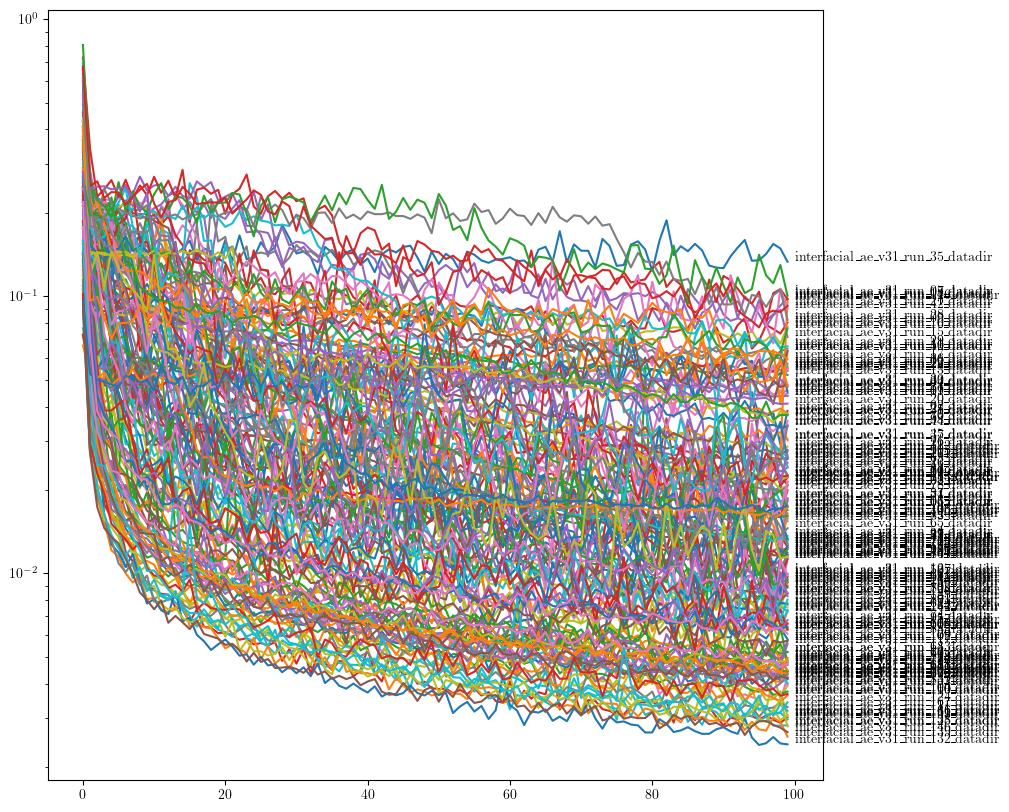

In [3]:
# Compare all the loss curves on one axis

name_to_loss = {}

for f in files:
    try:
        additional_dirs = 'usr/workspace/cutforth1/datamfae/spheres*/*'
        results_dir = list(f.glob(additional_dirs))[0]
        name_to_loss[f] = read_loss_curve_from_file(results_dir)
    except:
        print(f'Could not read {results_dir}')

fig, ax = plt.subplots(figsize=(10, 10))
loss_component = 'Total'
for f, loss in name_to_loss.items():
    ax.plot(loss[loss_component], label=f.name)

    # Annotate name on the end of the curve
    ax.text(len(loss[loss_component]), loss[loss_component][-1], f.name)
#ax.legend()
ax.set_yscale('log')
plt.show()



In [4]:

def extract_interface_type(outdir):
    final_part = '_'.join(outdir.stem.split('_')[:-2])
    #final_part = final_part.replace('datadir', '')

    str_to_type = {
        'TANH_EPSILON00078125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0015625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON003125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON00625': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON0125': InterfaceType.TANH_EPSILON,
        'TANH_EPSILON025': InterfaceType.TANH_EPSILON,
        'HEAVISIDE': InterfaceType.HEAVISIDE,
        'SIGNED_DISTANCE_EXACT': InterfaceType.SIGNED_DISTANCE_EXACT,
        'SIGNED_DISTANCE_APPROXIMATE': InterfaceType.SIGNED_DISTANCE_APPROXIMATE,
    }

    return str_to_type[final_part]

def extract_epsilon(outdir):
    final_part = '_'.join(outdir.stem.split('_')[:-2])

    str_to_epsilon = {
        'TANH_EPSILON00078125': 0.0078125,
        'TANH_EPSILON0015625': 0.015625,
        'TANH_EPSILON003125': 0.03125,
        'TANH_EPSILON00625': 0.0625,
        'TANH_EPSILON0125': 0.125,
        'TANH_EPSILON025': 0.25,
        'HEAVISIDE': None,
        'SIGNED_DISTANCE_EXACT': None,
        'SIGNED_DISTANCE_APPROXIMATE': None,
    }

    return str_to_epsilon[final_part]

def get_dataset_path(mu, interfacetype, epsilon):
    if interfacetype == InterfaceType.TANH_EPSILON:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/TANH_EPSILON{epsilon}')
    elif interfacetype == InterfaceType.HEAVISIDE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/HEAVISIDE')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_EXACT')
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        return pathlib.Path(f'/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_{mu:.2f}/SIGNED_DISTANCE_APPROXIMATE')
    else:
        raise ValueError('Unknown interface type')

def extract_mu(outdir):
    mid_part = outdir.parent.name.split('_')[-1]

    if mid_part == '100':
        return 1.0
    elif mid_part == '200':
        return 2.0
    elif mid_part == '250':
        return 2.5
    else:
        raise ValueError(f'Unknown mu type from {mid_part}, {outdir}')

In [5]:
outdir_to_params = {}

for outdir in files:
    additional_dirs = 'usr/workspace/cutforth1/datamfae/spheres*/*'
    results_dir = list(outdir.glob(additional_dirs))[0]
    print(results_dir.stem.split('_'))

    interfacetype = extract_interface_type(results_dir)
    epsilon = extract_epsilon(results_dir)
    mu = extract_mu(results_dir)
    model_path = get_model_path(results_dir, epoch=100)
    dim_mults = get_dim_mults(results_dir)
    dataset_path = get_dataset_path(mu, interfacetype, epsilon)
    max_train_samples = get_max_train_samples(results_dir)

    if not model_path.exists():
        continue

    assert model_path.exists(), f'{model_path} does not exist'
    assert dataset_path.exists(), f'{dataset_path} does not exist'
   
    params = {
       'interface_type': interfacetype,
        'mu': mu,
       'epsilon': epsilon,
       'model_path': model_path,
       'dataset_path': dataset_path,
       'dim_mults': dim_mults,
        'max_train_samples': max_train_samples,
    }
   
    outdir_to_params[outdir] = params
    
print(outdir_to_params)

['TANH', 'EPSILON0015625', 'seed4', 'maxtrainsamples200']
['HEAVISIDE', 'seed4', 'maxtrainsamples2000']
['HEAVISIDE', 'seed4', 'maxtrainsamples200']
['TANH', 'EPSILON00078125', 'seed4', 'maxtrainsamples1600']
['TANH', 'EPSILON0125', 'seed4', 'maxtrainsamples800']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples50']
['TANH', 'EPSILON0015625', 'seed4', 'maxtrainsamples400']
['TANH', 'EPSILON003125', 'seed4', 'maxtrainsamples2000']
['TANH', 'EPSILON003125', 'seed4', 'maxtrainsamples400']
['TANH', 'EPSILON00625', 'seed4', 'maxtrainsamples2000']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples200']
['HEAVISIDE', 'seed4', 'maxtrainsamples1600']
['TANH', 'EPSILON025', 'seed4', 'maxtrainsamples800']
['TANH', 'EPSILON025', 'seed4', 'maxtrainsamples200']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples1600']
['SIGNED', 'DISTANCE', 'EXACT', 'seed4', 'maxtrainsamples800']
['TANH', 'EPSILON00078125', 'seed4', 'maxtrainsamples50']
['TANH', 'EPSILON003125', 'seed4', 'maxtra

In [6]:
# Run inference for all
k = 0
for outdir, params in outdir_to_params.items():
    k += 1
    print('=' * 64)
    print(f"Dir {k} of {len(outdir_to_params)}")
    print('=' * 64)

    outfile = outdir / 'inference.npz'

    if outfile.exists():
        continue

    dataset = load_dataset(params['dataset_path'], max_num_samples=25_000)
    model = load_model(params['model_path'], dim_mults=params['dim_mults'])
    gts, preds = run_inference(dataset, model, N=50)
    
    # Save outdir, preds, params, gt to disk, ready to be reloaded at evaluation time!
    
    np.savez_compressed(outfile, gts=gts, preds=preds, **params)

INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.015625
INFO:src.datasets.volumetric_datasets:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.015625/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed splits of size: train=2000, val=500
INFO:src.datasets.volumetric_datasets:Loaded 500 files for split val
INFO:src.datasets.volumetric_datasets:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.015625/spheres_549.npz


Dir 1 of 168
Dir 2 of 168
Dir 3 of 168
Dir 4 of 168
Dir 5 of 168
Dir 6 of 168
Dir 7 of 168


INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:conv_ae_3d.models.baseline_model:Constructed ConvAutoencoderBaseline with 54532165 parameters [act_type = silu]
/Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/eval_utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via

Loading model to device: mps
Running inference on device: mps


  0%|          | 0/50 [00:00<?, ?it/s]/Users/murray/miniconda3/envs/mfe/lib/python3.12/site-packages/torch/nn/functional.py:4538: UserWarning: The operator 'aten::upsample_nearest3d.vec' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.upsample_nearest3d(input, output_size, scale_factors)
100%|██████████| 50/50 [00:48<00:00,  1.03it/s]
INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_2.00/TANH_EPSILON0.03125
INFO:src.datasets.volumetric_datasets:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_2.00/TANH_EPSILON0.03125/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed sp

Dir 8 of 168
Dir 9 of 168
Dir 10 of 168
Dir 11 of 168
Dir 12 of 168
Dir 13 of 168
Dir 14 of 168
Dir 15 of 168
Dir 16 of 168
Dir 17 of 168
Dir 18 of 168
Dir 19 of 168
Dir 20 of 168
Dir 21 of 168
Dir 22 of 168
Dir 23 of 168
Dir 24 of 168
Dir 25 of 168
Dir 26 of 168
Dir 27 of 168
Dir 28 of 168
Dir 29 of 168
Dir 30 of 168


INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:conv_ae_3d.models.baseline_model:Constructed ConvAutoencoderBaseline with 54532165 parameters [act_type = silu]


Loading model to device: mps
Running inference on device: mps


100%|██████████| 50/50 [00:48<00:00,  1.03it/s]
INFO:src.datasets.volumetric_datasets:Found 2500 .npz files in /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.25
INFO:src.datasets.volumetric_datasets:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.25/spheres_0.npz
INFO:src.datasets.volumetric_datasets:Constructed splits of size: train=2000, val=500
INFO:src.datasets.volumetric_datasets:Loaded 500 files for split val
INFO:src.datasets.volumetric_datasets:First file: /Users/murray/Projects/multphase_flow_encoder/multiphase_flow_encoder/src/preprocessing/data/mu_spheres/spheres_mu_1.00/TANH_EPSILON0.25/spheres_549.npz


Dir 31 of 168
Dir 32 of 168
Dir 33 of 168
Dir 34 of 168
Dir 35 of 168
Dir 36 of 168
Dir 37 of 168
Dir 38 of 168
Dir 39 of 168
Dir 40 of 168
Dir 41 of 168
Dir 42 of 168
Dir 43 of 168
Dir 44 of 168
Dir 45 of 168
Dir 46 of 168
Dir 47 of 168
Dir 48 of 168
Dir 49 of 168
Dir 50 of 168
Dir 51 of 168
Dir 52 of 168
Dir 53 of 168
Dir 54 of 168
Dir 55 of 168
Dir 56 of 168
Dir 57 of 168
Dir 58 of 168
Dir 59 of 168
Dir 60 of 168
Dir 61 of 168
Dir 62 of 168
Dir 63 of 168
Dir 64 of 168
Dir 65 of 168
Dir 66 of 168
Dir 67 of 168
Dir 68 of 168
Dir 69 of 168
Dir 70 of 168
Dir 71 of 168
Dir 72 of 168
Dir 73 of 168
Dir 74 of 168
Dir 75 of 168
Dir 76 of 168
Dir 77 of 168
Dir 78 of 168
Dir 79 of 168
Dir 80 of 168
Dir 81 of 168
Dir 82 of 168
Dir 83 of 168
Dir 84 of 168
Dir 85 of 168
Dir 86 of 168
Dir 87 of 168
Dir 88 of 168
Dir 89 of 168
Dir 90 of 168
Dir 91 of 168
Dir 92 of 168
Dir 93 of 168
Dir 94 of 168
Dir 95 of 168
Dir 96 of 168
Dir 97 of 168
Dir 98 of 168
Dir 99 of 168
Dir 100 of 168
Dir 101 of 168
Dir 

INFO:src.datasets.volumetric_datasets:Generated 500 samples of volumetric data
INFO:src.datasets.volumetric_datasets:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:conv_ae_3d.models.baseline_model:Constructed ConvAutoencoderBaseline with 54532165 parameters [act_type = silu]


Loading model to device: mps
Running inference on device: mps


100%|██████████| 50/50 [00:48<00:00,  1.04it/s]


Dir 113 of 168
Dir 114 of 168
Dir 115 of 168
Dir 116 of 168
Dir 117 of 168
Dir 118 of 168
Dir 119 of 168
Dir 120 of 168
Dir 121 of 168
Dir 122 of 168
Dir 123 of 168
Dir 124 of 168
Dir 125 of 168
Dir 126 of 168
Dir 127 of 168
Dir 128 of 168
Dir 129 of 168
Dir 130 of 168
Dir 131 of 168
Dir 132 of 168
Dir 133 of 168
Dir 134 of 168
Dir 135 of 168
Dir 136 of 168
Dir 137 of 168
Dir 138 of 168
Dir 139 of 168
Dir 140 of 168
Dir 141 of 168
Dir 142 of 168
Dir 143 of 168
Dir 144 of 168
Dir 145 of 168
Dir 146 of 168
Dir 147 of 168
Dir 148 of 168
Dir 149 of 168
Dir 150 of 168
Dir 151 of 168
Dir 152 of 168
Dir 153 of 168
Dir 154 of 168
Dir 155 of 168
Dir 156 of 168
Dir 157 of 168
Dir 158 of 168
Dir 159 of 168
Dir 160 of 168
Dir 161 of 168
Dir 162 of 168
Dir 163 of 168
Dir 164 of 168
Dir 165 of 168
Dir 166 of 168
Dir 167 of 168
Dir 168 of 168


In [7]:
# Go over each file, and load predictions, compute metrics from each volume

outdir_to_metrics = {}

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)
    
    gts = data['gts']
    preds = data['preds']
    
    # Convert to sharp interface
    interfacetype = params['interface_type']
    
    # Compute metrics
    # 2. Dice coefficient
    
    dices = []
    
    for gt, pred in zip(gts, preds):
        gt = get_phi_sharp(gt, interfacetype)
        pred = get_phi_sharp(pred, interfacetype)
        
        dice = dice_coefficient(gt, pred)
        dices.append(dice)
        
    print(np.mean(dices))
        
    outdir_to_metrics[outdir] = {
        'Dice': dices,
    }
    

../../output/lassen/interfacial_ae_v31_run_79_datadir
0.9570332439169869
../../output/lassen/interfacial_ae_v31_run_69_datadir
0.9753906511193905
../../output/lassen/interfacial_ae_v31_run_121_datadir
0.9460924739558131
../../output/lassen/interfacial_ae_v31_run_131_datadir
0.9813065227900853
../../output/lassen/interfacial_ae_v31_run_46_datadir
0.6097490381166555
../../output/lassen/interfacial_ae_v31_run_56_datadir
0.7262757831841943
../../output/lassen/interfacial_ae_v31_run_24_datadir
0.6913657987629186
../../output/lassen/interfacial_ae_v31_run_34_datadir
0.6659902344263529
../../output/lassen/interfacial_ae_v31_run_143_datadir
0.9652804966009976
../../output/lassen/interfacial_ae_v31_run_153_datadir
0.9843051425252743
../../output/lassen/interfacial_ae_v31_run_02_datadir
0.4044663185530667
../../output/lassen/interfacial_ae_v31_run_12_datadir
0.7350609730337471
../../output/lassen/interfacial_ae_v31_run_165_datadir
0.9664000527326896
../../output/lassen/interfacial_ae_v31_run_107

In [ ]:
import matplotlib.pyplot as plt
from fractions import Fraction

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

# Group data by compression ratio
compression_to_dice_data = {params['compression_ratio']: {} for params in outdir_to_params.values()}

# Sort compression ratios
compression_to_dice_data = dict(sorted(compression_to_dice_data.items(), key=lambda item: item[0]))

for outdir, params in outdir_to_params.items():
    compression_ratio = params['compression_ratio']
    interface_type = params['interface_type']
    epsilon = params['epsilon']
    dice_scores = outdir_to_metrics[outdir]['Dice']

    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'TANH_{epsilon}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        label = 'SDF approx'
    else:
        label = 'Sharp'

    if label not in compression_to_dice_data[compression_ratio]:
        compression_to_dice_data[compression_ratio][label] = []

    compression_to_dice_data[compression_ratio][label].extend(dice_scores)

# Sort labels by interface type
for compression_ratio in compression_to_dice_data:
    compression_to_dice_data[compression_ratio] = dict(sorted(compression_to_dice_data[compression_ratio].items(), key=lambda item: item[0]))

# Sort labels by epsilon value
for compression_ratio in compression_to_dice_data:
    compression_to_dice_data[compression_ratio] = dict(sorted(compression_to_dice_data[compression_ratio].items(), key=lambda item: float(item[0].split('_')[-1]) if 'TANH' in item[0] else 0))
    
# Convert epsilon values to fractions
for compression_ratio in compression_to_dice_data:
    for label in list(compression_to_dice_data[compression_ratio].keys()):
        if 'TANH' in label:
            epsilon = float(label.split('_')[-1])
            x = compression_to_dice_data[compression_ratio].pop(label)
            compression_to_dice_data[compression_ratio][f'Tanh {float_to_fraction(epsilon)}'] = x

# Create box plots
fig, axs = plt.subplots(1, len(compression_to_dice_data), figsize=(12, 3), dpi=200)

for i, compression_ratio in enumerate(compression_to_dice_data):
    data = [compression_to_dice_data[compression_ratio][label] for label in compression_to_dice_data[compression_ratio]]
    labels = list(compression_to_dice_data[compression_ratio].keys())
    
    axs[i].boxplot(data, tick_labels=labels)
    axs[i].set_title(f'Compression ratio={int(compression_ratio)}')
    axs[i].set_xlabel('Interface Type')
    axs[i].set_ylabel('Dice Coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].tick_params(axis='x', rotation=90)
    
axs[0].set_ylim(0.9, 1)
axs[1].set_ylim(0.9, 1)

plt.tight_layout()
plt.show()

In [ ]:
# Compute all HD metrics and then plot them as above

def hausdorff_distance(gt_patch, pred_patch, level: float = 0.5):
    """Returns the Hausdorff distance of the foreground region, obtained by thresholding the images at level

    Note:
        The distance is in units of voxels, assumes isotropic voxels

    Args:
        gt_patch: Ground truth patch
        pred_patch: Predicted patch
        level: Threshold level
        max_num_points: Maximum number of points to use in the distance calculation (for speed purposes)
    """
    gt_patch = gt_patch > level
    pred_patch = pred_patch > level

    gt_indices = np.argwhere(gt_patch)
    pred_indices = np.argwhere(pred_patch)
    
    if len(gt_indices) == 0 or len(pred_indices) == 0:
        return np.nan

    h_1 = directed_hausdorff(gt_indices, pred_indices)[0]
    h_2 = directed_hausdorff(pred_indices, gt_indices)[0]
    return max(h_1, h_2)


outdir_to_hausdorff = {}

for outdir, params in outdir_to_params.items():
    print(outdir)
    outfile = outdir / 'inference.npz'
    data = np.load(outfile)

    gts = data['gts']
    preds = data['preds']

    # Convert to sharp interface
    interfacetype = params['interface_type']

    hds = []

    for gt, pred in tqdm(list(zip(gts, preds))[:50]):
        gt = get_phi_sharp(gt, interfacetype)
        pred = get_phi_sharp(pred, interfacetype)
        
        hd = hausdorff_distance(gt, pred, level=0.5)
        hds.append(hd)

    print(np.mean(hds))

    outdir_to_metrics[outdir] = {
        'Hausdorff': hds,
    }



In [ ]:


# Filter out any nan values
for outdir, metrics in outdir_to_metrics.items():
    hds = metrics['Hausdorff']
    hds = [hd for hd in hds if not np.isnan(hd)]
    outdir_to_metrics[outdir]['Hausdorff'] = hds

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

# Group data by compression ratio
compression_to_hd_data = {params['compression_ratio']: {} for params in outdir_to_params.values()}

# Sort compression ratios
compression_to_hd_data = dict(sorted(compression_to_hd_data.items(), key=lambda item: item[0]))

for outdir, params in outdir_to_params.items():
    compression_ratio = params['compression_ratio']
    interface_type = params['interface_type']
    epsilon = params['epsilon']
    hd_scores = outdir_to_metrics[outdir]['Hausdorff']

    if interface_type == InterfaceType.TANH_EPSILON:
        label = f'TANH_{epsilon}'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT:
        label = 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        label = 'SDF approx'
    else:
        label = 'Sharp'

    if label not in compression_to_hd_data[compression_ratio]:
        compression_to_hd_data[compression_ratio][label] = []

    compression_to_hd_data[compression_ratio][label].extend(hd_scores)

# Sort labels by interface type
for compression_ratio in compression_to_hd_data:
    compression_to_hd_data[compression_ratio] = dict(sorted(compression_to_hd_data[compression_ratio].items(), key=lambda item: item[0]))

# Sort labels by epsilon value
for compression_ratio in compression_to_hd_data:
    compression_to_hd_data[compression_ratio] = dict(sorted(compression_to_hd_data[compression_ratio].items(), key=lambda item: float(item[0].split('_')[-1]) if 'TANH' in item[0] else 0))

# Convert epsilon values to fractions
for compression_ratio in compression_to_hd_data:
    for label in list(compression_to_hd_data[compression_ratio].keys()):
        if 'TANH' in label:
            epsilon = float(label.split('_')[-1])
            x = compression_to_hd_data[compression_ratio].pop(label)
            compression_to_hd_data[compression_ratio][f'Tanh {float_to_fraction(epsilon)}'] = x

# Create box plots
fig, axs = plt.subplots(1, len(compression_to_hd_data), figsize=(12, 3), dpi=200)

for i, compression_ratio in enumerate(compression_to_hd_data):
    data = [compression_to_hd_data[compression_ratio][label] for label in compression_to_hd_data[compression_ratio]]
    labels = list(compression_to_hd_data[compression_ratio].keys())

    axs[i].boxplot(data, tick_labels=labels)
    axs[i].set_title(f'Compression Ratio={int(compression_ratio)}')
    axs[i].set_xlabel('Interface Type')
    axs[i].set_ylabel('Hausdorff distance')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].tick_params(axis='x', rotation=90)
    
axs[0].set_ylim(0, 5)
axs[1].set_ylim(0, 10)
axs[2].set_ylim(0, 40)

plt.tight_layout()
plt.show()

In [ ]:

from scipy.ndimage import label

# Function to compute droplet PDF
def compute_droplet_pdf(arr):
    labeled_arr, num_labels = label(arr)
    sizes = np.bincount(labeled_arr.ravel())
    return sizes[1:]

# Group PDF data by interface type, epsilon, and mu value

interface_to_epsilon_to_mu_data = {}

for interface in InterfaceType:
    try:
        epsilons = sorted(set(params['epsilon'] for params in outdir_to_params.values() if params['interface_type'] == interface))
    except:
        epsilons = [None]
    interface_to_epsilon_to_mu_data[interface] = {epsilon: {mu: {'gt': [], 'pred': []} for mu in mus} for epsilon in epsilons}

print(interface_to_epsilon_to_mu_data)

for outdir, params in outdir_to_params.items():
    mu = params['mu']
    epsilon = params['epsilon']
    interface_type = params['interface_type']
    gts = outdir_to_metrics[outdir]['gts']
    preds = outdir_to_metrics[outdir]['preds']
    
    for gt, pred in zip(gts, preds):
        gt, pred = get_phi_sharp_pred_and_gt(pred, gt, interface_type)
        interface_to_epsilon_to_mu_data[interface_type][epsilon][mu]['gt'].extend(compute_droplet_pdf(gt))
        interface_to_epsilon_to_mu_data[interface_type][epsilon][mu]['pred'].extend(compute_droplet_pdf(pred))


In [ ]:
def get_label(interfacetype, epsilon) -> str:
    if interfacetype == InterfaceType.TANH_EPSILON:
        return f'TANH_{epsilon}'
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_EXACT:
        return 'SDF exact'
    elif interfacetype == InterfaceType.SIGNED_DISTANCE_APPROXIMATE:
        return 'SDF approx'
    elif interfacetype == InterfaceType.HEAVISIDE:
        return 'Sharp'
    else:
        raise ValueError('Unknown interface type')
    
# Now change interface_to_epsilon_to_mu_data to label_to_mu_data

label_to_mu_data = {}

for interface, epsilon_to_mu_data in interface_to_epsilon_to_mu_data.items():
    for epsilon, mu_data in epsilon_to_mu_data.items():
        label = get_label(interface, epsilon)
        print(label)
        
        if label not in label_to_mu_data:
            label_to_mu_data[label] = {mu: {'gt': [], 'pred': []} for mu in mus}
        
        for mu in mus:
            label_to_mu_data[label][mu]['gt'].extend(mu_data[mu]['gt'])
            label_to_mu_data[label][mu]['pred'].extend(mu_data[mu]['pred'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the droplet PDFs for each label
fig, axs = plt.subplots(len(label_to_mu_data), 1, figsize=(4, 12), dpi=200, sharex=True, sharey=True)

colors = ['b', 'g', 'r']
num_bins = 25

for i, (label, mu_data) in enumerate(label_to_mu_data.items()):
    for j, mu in enumerate(mus):
        data = mu_data[mu]
        print(label, mu, len(data['gt']), len(data['pred']))
        min_bin = 1
        max_bin = 1e6
        bins = np.logspace(np.log10(min_bin), np.log10(max_bin), num_bins)

        axs[i].hist(data['gt'], bins=bins, alpha=0.5, label=f'GT mu={mu}', histtype='step', color=colors[j])
        axs[i].hist(data['pred'], bins=bins, alpha=0.5, label=f'Pred mu={mu}', histtype='step', linestyle='dashed', color=colors[j])
        axs[i].set_title(f'{label}')
        axs[i].set_xlabel('Droplet size')
        axs[i].set_ylabel('Frequency')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].set_yscale('log')
        axs[i].set_xscale('log')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

def compute_surface_area_density(phi):
    # Assume phi represents a volume fraction
    dx = 1 / phi.shape[-1]
    grad_phi = np.gradient(phi, dx)  # List of (64, 64, 64) arrays
    abs_grad_phi = np.sqrt(np.sum([g**2 for g in grad_phi], axis=0))
    surface_area = np.sum(abs_grad_phi)
    volume = np.sum(phi)
    return surface_area / volume

def compute_num_components(phi):
    labeled_arr, num_labels = ndimage.label(phi)
    return num_labels

def compute_volume_fraction(phi):
    return np.sum(phi) / phi.size

plot_label_to_mu_to_sigmas = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_dices = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_num_components = {label: {mu: [] for mu in mus} for label in label_to_mu_data}
plot_label_to_mu_to_volume_fraction = {label: {mu: [] for mu in mus} for label in label_to_mu_data}

for outdir, params in outdir_to_params.items():
    gts = outdir_to_metrics[outdir]['gts']
    interfacetype = params['interface_type']
    plot_label = get_label(interfacetype, params['epsilon'])
    mu = params['mu']
    dice_scores = outdir_to_metrics[outdir]['Dice']
    
    assert len(gts) == len(dice_scores)

    for gt in gts:
        phi = get_phi_sharp(gt, interfacetype)
        sigma = compute_surface_area_density(phi)
        vol_frac = compute_volume_fraction(phi)
        num_components = compute_num_components(phi)
        plot_label_to_mu_to_sigmas[plot_label][mu].append(sigma)
        plot_label_to_mu_to_num_components[plot_label][mu].append(num_components)
        plot_label_to_mu_to_volume_fraction[plot_label][mu].append(vol_frac)
        
    for dice in dice_scores:
        plot_label_to_mu_to_dices[plot_label][mu].append(dice)
        

In [ ]:
import matplotlib.cm as cm

# Scatter plot of sigma vs dice coefficient
fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

unique_mu_values = sorted({mu for mu_to_sigmas in plot_label_to_mu_to_sigmas.values() for mu in mu_to_sigmas})
colormap = cm.get_cmap('viridis', len(unique_mu_values) + 1)
mu_to_color = {mu: colormap(i) for i, mu in enumerate(unique_mu_values)}

for i, label in enumerate(plot_label_to_mu_to_sigmas):
    mu_to_sigmas = plot_label_to_mu_to_sigmas[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, sigma in mu_to_sigmas.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(sigma, dice_scores, alpha=0.25, label=f'$\\mu$={mu}', c=mu_to_color[mu])

    axs[i].set_title(label)
    axs[i].set_xlabel('$\\Sigma$')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_xlim(0, 75)
    axs[i].set_ylim(0.0, 1)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot of num_components vs dice coefficient

fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

for i, label in enumerate(plot_label_to_mu_to_num_components):
    mu_to_num_components = plot_label_to_mu_to_num_components[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, num_components in mu_to_num_components.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(num_components, dice_scores, alpha=0.25, label=f'$\\mu$={mu}', c=mu_to_color[mu])

    axs[i].set_title(label)
    axs[i].set_xlabel('Num components')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])
    
# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot of volume fraction vs dice coefficient

fig, axs = plt.subplots(3, 3, figsize=(7, 6), sharey=True, dpi=200)
axs = axs.flatten()  # Flatten the 3x3 array to make indexing easier

for i, label in enumerate(plot_label_to_mu_to_volume_fraction):
    mu_to_volfrac = plot_label_to_mu_to_volume_fraction[label]
    mu_to_dices = plot_label_to_mu_to_dices[label]

    for mu, num_components in mu_to_volfrac.items():
        dice_scores = mu_to_dices[mu]
        axs[i].scatter(num_components, dice_scores, alpha=0.25, label=f'$\\mu$={mu}', color=mu_to_color[mu])

    axs[i].set_title(label)
    axs[i].set_xlabel('Volume fraction')
    axs[i].set_ylabel('Dice coefficient')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Add a custom legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skimage

def visualize_gt_pred(interface_type, mu, epsilon, sample_index):
    for outdir, params in outdir_to_params.items():
        if params['interface_type'] == interface_type and params['mu'] == mu and params['epsilon'] == epsilon:
            
            data = np.load(outdir / 'inference.npz')
            gts = data['gts']
            preds = data['preds']
            
            gt = gts[sample_index]
            pred = preds[sample_index]
            
            gt = get_phi_sharp(gt, interface_type)
            pred = get_phi_sharp(pred, interface_type)
            
            dice = dice_coefficient(gt, pred)
            vol_frac = compute_volume_fraction(gt)
            sigma = compute_surface_area_density(gt)
            num_components = compute_num_components(gt)
            
            print(f'Dice: {dice}, Vol frac: {vol_frac}, Sigma: {sigma}, Num components: {num_components}')
            
            fig, axs = plt.subplots(1, 2, figsize=(12, 6))
            axs[0].imshow(gt[gt.shape[0] // 2], cmap='gray')
            axs[0].set_title('Ground Truth')
            axs[1].imshow(pred[pred.shape[0] // 2], cmap='gray')
            axs[1].set_title('Prediction')
            plt.show()



            fig = plt.figure(figsize=(6, 6), dpi=200)
            ax = fig.add_subplot(121, projection="3d")
            verts, faces, normals, values = skimage.measure.marching_cubes(
                gt, 0.5, spacing=(1, 1, 1), allow_degenerate=False, method='lewiner'
            )
            mesh = Poly3DCollection(verts[faces])
            mesh.set_edgecolor("k")
            mesh.set_linewidth(0.05)
            mesh.set_alpha(0.9)
            ax.add_collection3d(mesh)
            
            ax = fig.add_subplot(122, projection="3d")
            verts, faces, normals, values = skimage.measure.marching_cubes(
                pred, 0.5, spacing=(1, 1, 1), allow_degenerate=False, method='lewiner'
            )
            mesh = Poly3DCollection(verts[faces])
            mesh.set_edgecolor("k")
            mesh.set_linewidth(0.05)
            mesh.set_alpha(0.9)
            ax.add_collection3d(mesh)

            plt.tight_layout()
            break

# Example usage
visualize_gt_pred(InterfaceType.TANH_EPSILON, 2.0, 1/32, 0)

In [ ]:
def find_samples_in_volume_fraction_window(interface_type, mu, epsilon, volume_fraction_min, volume_fraction_max):
    sample_indices = []
    
    for outdir, params in outdir_to_params.items():
        if params['interface_type'] == interface_type and params['mu'] == mu and params['epsilon'] == epsilon:
            data = np.load(outdir / 'inference.npz')
            gts = data['gts']
            preds = data['preds']
            
            for i, gt, pred in zip(range(len(gts)), gts, preds):
                gt = get_phi_sharp(gt, interface_type)
                pred = get_phi_sharp(pred, interface_type)
                dice = dice_coefficient(gt, pred)
                vol_frac = compute_volume_fraction(gt)
                if volume_fraction_min <= vol_frac <= volume_fraction_max:
                    sample_indices.append((i, dice))
            
    return sample_indices

# Example usage
sample_indices = find_samples_in_volume_fraction_window(InterfaceType.TANH_EPSILON, 1.0, 1/32, 0.25, 0.26)
print(sample_indices)

In [ ]:
# Visualise a good and bad sample with same volume fraction

visualize_gt_pred(InterfaceType.TANH_EPSILON, 1.0, 1/32, 11)
visualize_gt_pred(InterfaceType.TANH_EPSILON, 1.0, 1/32, 42)

# Summary

 - 

# Next steps

  - 